In [2]:
import pandas as pd
import numpy as np



data = pd.read_csv('..\\Fermi-LAT Data\\fl_numericalonly_nopositional_withclasses.csv',index_col=0)

'''
In 'data' all unknown BCUs are assigned 0. 
All BLLs are assigned 1 and all FSRQs are assigned 2.
Radio Galaxies = 3 and Other = 4
'''

mask1 = data['CLASS1'] == 4
mask2 = data['CLASS1'] == 0
mask3 = data['CLASS1'] == 3
data = data[~mask1]
data = data[~mask2]
data = data[~mask3]

''' JOINING BLLs AND FSRQs INTO A SINGLE CATEGORY '''

#data = data.replace(2,1)

data = data.dropna()
#data = data.reset_index()

print(len(data['CLASS1']))
data_test = data[~(data['CLASS1'] == 1)]
print(len(data_test['CLASS1']))
print(data.columns)

1383
470
Index(['Signif_Avg', 'Pivot_Energy', 'Flux1000', 'Energy_Flux100',
       'PL_Flux_Density', 'PL_Index', 'LP_Flux_Density', 'LP_Index', 'LP_beta',
       'LP_SigCurv', 'LP_EPeak', 'PLEC_Flux_Density', 'PLEC_IndexS',
       'PLEC_ExpfactorS', 'PLEC_Exp_Index', 'PLEC_SigCurv', 'Npred',
       'Variability_Index', 'Frac_Variability', 'ASSOC_PROB_BAY',
       'ASSOC_PROB_LR', 'Flux_Band_0', 'Flux_Band_1', 'Flux_Band_2',
       'Flux_Band_3', 'Flux_Band_4', 'Flux_Band_5', 'Flux_Band_6',
       'Flux_Band_7', 'nuFnu_Band_0', 'nuFnu_Band_1', 'nuFnu_Band_2',
       'nuFnu_Band_3', 'nuFnu_Band_4', 'nuFnu_Band_5', 'nuFnu_Band_6',
       'nuFnu_Band_7', 'Sqrt_TS_Band_2', 'Sqrt_TS_Band_3', 'Sqrt_TS_Band_4',
       'Sqrt_TS_Band_5', 'Flux_History_0', 'Flux_History_1', 'Flux_History_2',
       'Flux_History_3', 'Flux_History_4', 'Flux_History_5', 'Flux_History_6',
       'Flux_History_7', 'Sqrt_TS_History_0', 'Sqrt_TS_History_1',
       'Sqrt_TS_History_2', 'Sqrt_TS_History_3', 'Sqrt_TS_His

C:\Users\ioanp\AppData\Local\Temp\ipykernel_9052\2679251408.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[~mask2]
C:\Users\ioanp\AppData\Local\Temp\ipykernel_9052\2679251408.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[~mask3]


We will split the dataset (obtained from sklearn load_digits) into a training and test set using the code below 

In [3]:

X = data.loc[:, data.columns != 'CLASS1']
Y = data['CLASS1']


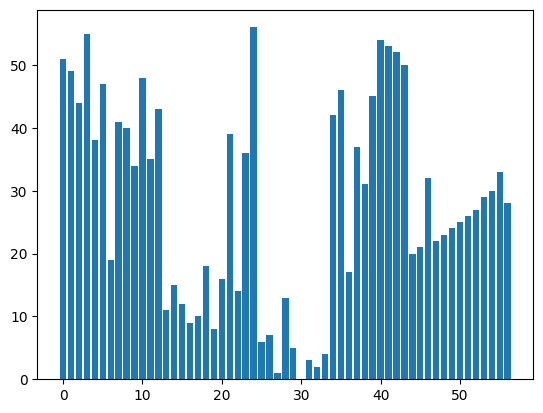

In [4]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

ranks = fisher_score.fisher_score(np.array(X),np.array(Y))

#print(ranks)
#print(data.columns)
#print(ranks,np.array(data.columns))
feat_importances = pd.DataFrame((np.array([ranks, np.array(X.columns)]).T),columns=['ranks','features'])

fig, ax = plt.subplots()
xs = np.linspace(0,1,len(feat_importances.value_counts()))
xs = np.arange(0,len(np.array(X.T)),1)
ax.bar(xs ,feat_importances['ranks'], width =0.8)

plt.show()

#fisher = pd.DataFrame((feat_importances),columns=['features','fisher score'])
#feat_importances.head

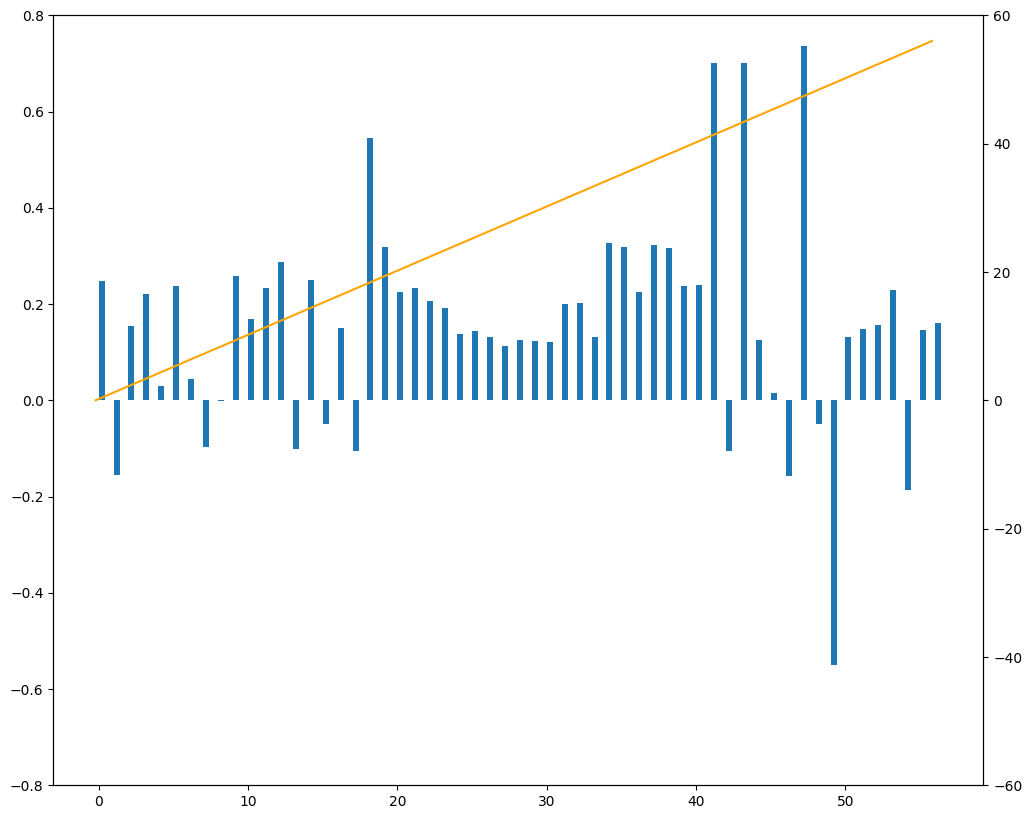

In [5]:
from sklearn.feature_selection import r_regression

ranks = r_regression(X,Y)

''' 
Pearson's 'r' calculated as E[(X[:, i] - mean(X[:, i])) * (y - mean(y))] / (std(X[:, i]) * std(y))
'''


pearson = pd.DataFrame((np.array([ranks, np.array(X.columns)]).T),columns=['pearson','features'])
var_ranking = pd.merge(pearson,feat_importances, on = 'features')
var_ranking = var_ranking.sort_values(by='ranks')
#print(var_ranking)

fig, ax = plt.subplots(figsize=(12,10))
ax1 = ax.twinx()
xs = np.linspace(0,1,len(pearson.value_counts()))
xs = np.arange(0,len(np.array(X.T)),1)
ax.bar(xs+0.2 ,var_ranking['pearson'], width =0.4)
ax.set_ylim(-0.8,0.8)
ax1.set_ylim(-60,60)
ax1.plot(xs-0.2,var_ranking['ranks'],color = 'orange')



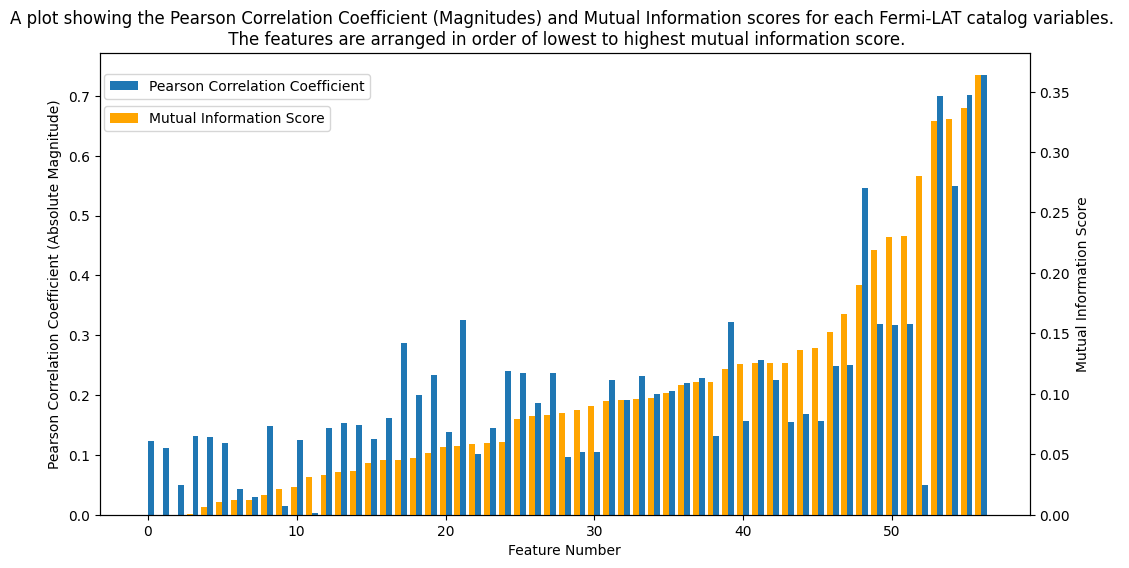

In [6]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X,Y)


''' 
Mutual info classification for each variable
'''


mutual = pd.DataFrame((np.array([mi, np.array(X.columns)]).T),columns=['mutual information','features'])
var_ranking1 = pd.merge(mutual,var_ranking, on = 'features')
var_ranking1 = var_ranking1.sort_values(by='mutual information')
#print(var_ranking)

plt.style.use('default')

fig, ax = plt.subplots(figsize=(12,6))
ax1 = ax.twinx()
xs = np.linspace(0,1,len(pearson.value_counts()))
xs = np.arange(0,len(np.array(X.T)),1)
ax.bar(xs+0.2 ,abs(var_ranking1['pearson']), width =0.4, label = 'Pearson Correlation Coefficient')
#ax.set_ylim(0,1)
#ax.set_ylim(0,1)
ax1.set_ylabel('Mutual Information Score')
ax.set_ylabel('Pearson Correlation Coefficient (Absolute Magnitude)')
ax.set_xlabel('Feature Number')
ax1.bar(xs-0.2,var_ranking1['mutual information'],width=0.4,color = 'orange', label = 'Mutual Information Score')
ax.set_title('A plot showing the Pearson Correlation Coefficient (Magnitudes) and Mutual Information scores for each Fermi-LAT catalog variables. \n The features are arranged in order of lowest to highest mutual information score.')
ax.legend(loc = (0.005,0.9))
ax1.legend(loc = (0.005,0.83))

In [7]:

var_ranking1 = var_ranking1.sort_values(by='mutual information')
mi_rank = np.arange(0,len(var_ranking1['mutual information']),1)
var_ranking1['mutual information score'] = mi_rank
var_ranking1 = var_ranking1.sort_values(by='pearson')
pearson_score = np.arange(0,len(var_ranking1['pearson']),1)
var_ranking1['pearson score'] = pearson_score
var_ranking1['total score'] = var_ranking1['pearson score'] + var_ranking1['mutual information score']

var_ranking1 = var_ranking1.sort_values(by='total score',ascending=True)

#var_ranking1 = var_ranking1.reset_index()
rm_features = np.array([])
for i in range(0,30):
    rm_features = np.append(rm_features,var_ranking1['features'][i])

newdata = data.drop(columns=rm_features)

In [8]:
newdata.to_csv('..\\Fermi-LAT Data\\fl_varranked.csv')

: 